In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.fftpack
import csv
import os

In [53]:
# list to store file lines
lines = []
# read file
with open(r"TA960-Nr1-220509-2.tcsv", 'r') as fp:
    # read an store all lines into list
    lines = fp.readlines()

# Write file
with open(r"Test.tcsv", 'w') as fp:
    # iterate each line
    for number, line in enumerate(lines):
        # delete line 5 and 8. or pass any Nth line you want to remove
        # note list index starts from 0
        if number not in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
            fp.write(line)

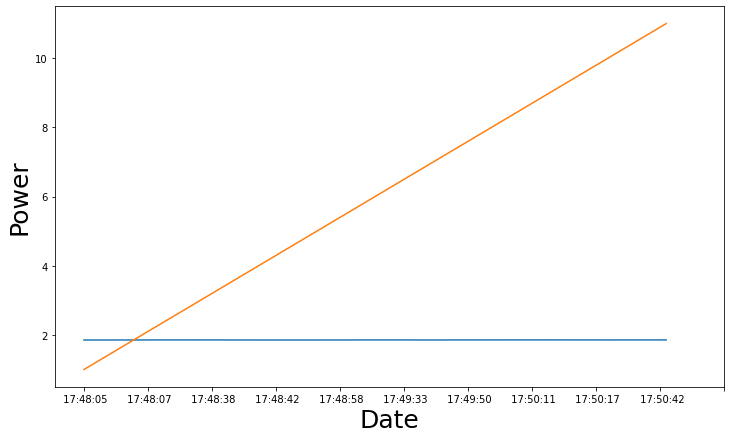

In [54]:
dataset = pd.read_csv('test.tcsv', sep=";",header = None)
accData=dataset.values.tolist()
#accData=np.asarray([np.asarray(elem) for elem in accData])
dataset['A'] = dataset[0] 
dataset['B'] = dataset[1] 
dataset['C'] = dataset[2] 
dataset['D'] = dataset[3]
C0 = np.array(dataset['A'])
C1 = np.array(dataset['B'])
C2 = np.array(dataset['C'])
C3 = np.array(dataset['D'])

figure,ax=plt.subplots(1)
ax.plot(C1, C2)
ax.plot(C1, C3)
ax.set_xlabel(r'Date',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
ax.set_xticks(np.arange(0, len(C1)+1, len(C1)/10));


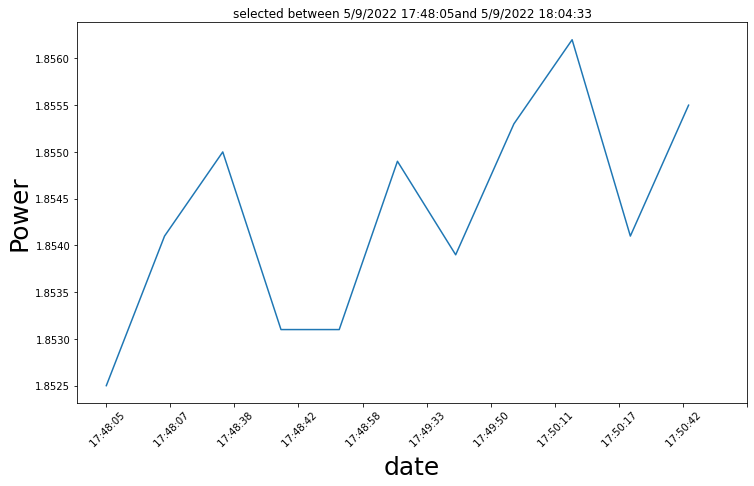

In [55]:
dataset['D'] = pd.to_datetime(dataset['A'] + ' ' + dataset['B'])

start_date = "5/9/2022 17:48:05" #Provide your start dateTime as input here in the same exact format
end_date = "5/9/2022 18:04:33" #Provide your end dateTime as input here in the same exact format

mask = (dataset['D'] >= start_date) & (dataset['D'] <= end_date)

selected_dataset = dataset.loc[mask]

C0_selected = np.array(selected_dataset['A'])
C1_selected = np.array(selected_dataset['B'])
C2_selected = np.array(selected_dataset['C'])
C3_selected = np.array(selected_dataset['D'])
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)
ax.plot(C1_selected,C2_selected)
ax.tick_params(labelsize=10)
ax.set_xlabel('date',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
ax.set_xticks(np.arange(0, len(C1_selected)+1, len(C1_selected)/10));
ax.set_title('selected between '+start_date +'and '+ end_date);


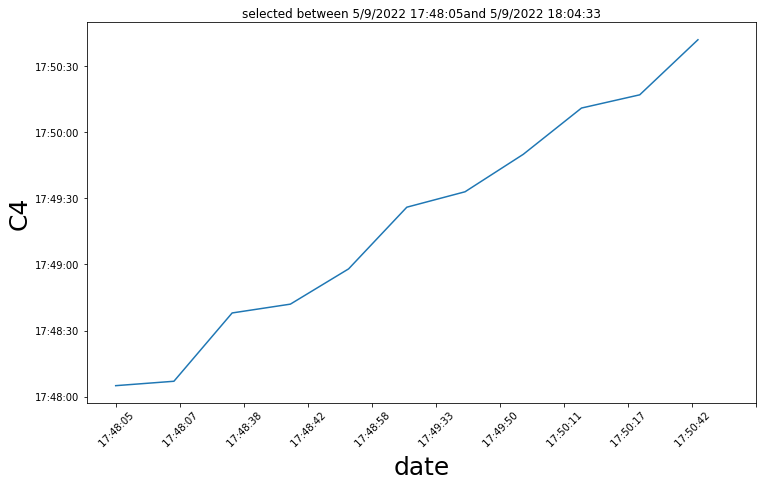

In [56]:
figure,ax=plt.subplots(1)

plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)

ax.plot(C1_selected,C3_selected)
ax.tick_params(labelsize=10)
ax.set_xlabel('date',fontsize=25)
ax.set_ylabel(r'C4',fontsize=25)
ax.set_xticks(np.arange(0, len(C1_selected)+1, len(C1_selected)/10));
ax.set_title('selected between '+start_date +'and '+ end_date);


In [57]:
os.remove('test.tcsv')

In [58]:
def rms(x):
    return np.sqrt(np.vdot(x, x)/x.size)
def mean(x):
    return np.sum(x)/x.size

r = rms(C3)
print(r)

m = mean((C3))
print(m)
print(C3)

6.782329983125268
6.0
[ 1  2  3  4  5  6  7  8  9 10 11]


In [59]:
print(rms)
print(mean)

<function rms at 0x0000019596F42C10>
<function mean at 0x00000195C3237700>
